In [1]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
import nltk

In [2]:
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')
#nltk.download('stopwords')

In [3]:
tweets = pd.read_csv('tweet_df.csv')

In [4]:
tweets['fav_rate'] = tweets['Num_Favorites']/tweets['Num_Followers'] * 100
tweets['retweet_rate'] = tweets['Num_Retweets']/tweets['Num_Followers'] * 100

In [5]:
tweets

,Tweet,Num_Favorites,Num_Retweets,Num_Followers,Created_At,id,fav_rate,retweet_rate
0,New York women are crushing on Andrew Cuomo: '...,146,16,1618684,2020-03-22 04:41:05,1241585667613896704,0.009020,0.000988
1,This is the scene at one of Sydney’s many nort...,1626,430,247370,2020-03-22 04:42:18,1241585976385753089,0.657315,0.173829
2,'Masked Singer' gifts Alice with photos of Cha...,1573,412,5456231,2020-03-22 04:44:51,1241586614243135496,0.028829,0.007551
3,Maddow - the woman who has peddled lies and wi...,1486,613,421490,2020-03-22 04:47:35,1241587305644724225,0.352559,0.145436
4,If any other President in recent U.S&gt; histo...,2219,628,409468,2020-03-22 04:47:35,1241587304486989825,0.541923,0.153370
...,...,...,...,...,...,...,...,...
579,I am a great friend and admirer of the Queen &...,171292,40125,75463706,2020-03-29 19:00:26,1244338645198352386,0.226986,0.053171
580,“...but i’ve been stuck inside this place for ...,53462,12825,11518637,2020-03-29 19:09:09,1244340838521425920,0.464135,0.111341
581,Now's a great time to call dibs on the comfies...,6618,2190,1153867,2020-03-29 19:36:16,1244347662612086784,0.573550,0.189797
582,Thank you very much to Ken Langone for being a...,16333,3407,75463706,2020-03-29 20:03:36,1244354540486512640,0.021644,0.004515


In [6]:
def get_wordnet_pos(word):
    """
    Map POS tag to first character lemmatize() accepts
    """
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


def preprocess(tweet: str, additional_stopwords: set) -> str:
    text_clean = tweet.lower()

    # Remove non-alphabet
    text_clean = re.sub(r'[^a-zA-Z]|(\w+:\/\/\S+)',' ', text_clean).split()

    # Remove short words (length < 3)
    text_clean = [w for w in text_clean if len(w)>2]

    # Lemmatize text with the appropriate POS tag
    lemmatizer = WordNetLemmatizer()
    text_clean = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in text_clean]

    # Filter out stop words in English 
    stops = stopwords.words('english')+ additional_stopwords
    text_clean = [w for w in text_clean if w not in stops]
    
    return text_clean

In [7]:
additional_stopwords = ['amp', 'get', 'one', 'go', 'day', 'say', 'make', 'new']

In [8]:
clean_tweets = tweets.copy()
clean_tweets['Tweet'] = clean_tweets['Tweet'].apply(
    preprocess, 
    args=(additional_stopwords,)
)

In [9]:
clean_tweets

,Tweet,Num_Favorites,Num_Retweets,Num_Followers,Created_At,id,fav_rate,retweet_rate
0,"[york, woman, crush, andrew, cuomo, single]",146,16,1618684,2020-03-22 04:41:05,1241585667613896704,0.009020,0.000988
1,"[scene, sydney, many, northern, beach, right, ...",1626,430,247370,2020-03-22 04:42:18,1241585976385753089,0.657315,0.173829
2,"[masked, singer, gift, alice, photo, chan, sub...",1573,412,5456231,2020-03-22 04:44:51,1241586614243135496,0.028829,0.007551
3,"[maddow, woman, peddle, lie, wild, conspiracy,...",1486,613,421490,2020-03-22 04:47:35,1241587305644724225,0.352559,0.145436
4,"[president, recent, history, something, like, ...",2219,628,409468,2020-03-22 04:47:35,1241587304486989825,0.541923,0.153370
...,...,...,...,...,...,...,...,...
579,"[great, friend, admirer, queen, united, kingdo...",171292,40125,75463706,2020-03-29 19:00:26,1244338645198352386,0.226986,0.053171
580,"[stuck, inside, place, end]",53462,12825,11518637,2020-03-29 19:09:09,1244340838521425920,0.464135,0.111341
581,"[great, time, call, dibs, comfiest, spot, livi...",6618,2190,1153867,2020-03-29 19:36:16,1244347662612086784,0.573550,0.189797
582,"[thank, much, ken, langone, great, american, w...",16333,3407,75463706,2020-03-29 20:03:36,1244354540486512640,0.021644,0.004515


In [10]:
from collections import Counter
tweet_list = list(clean_tweets['Tweet'])
counts = Counter(x for xs in tweet_list for x in set(xs))

In [11]:
counts.most_common(10)

[('coronavirus', 56),
 ('people', 56),
 ('need', 53),
 ('trump', 51),
 ('american', 47),
 ('time', 44),
 ('work', 41),
 ('covid', 38),
 ('take', 35),
 ('virus', 34)]

In [12]:
keyword_tuples = []

for count in counts.most_common(10):
    keyword = count[0]
    
    total_favs = 0
    total_retweets = 0
    total_retweet_rate = 0.0
    total_fav_rate = 0.0
    count = 0
    
    for index, row in clean_tweets.iterrows():
        
        if keyword in row['Tweet']:
            
            total_favs += row['Num_Favorites']
            total_retweets += row['Num_Retweets']
            total_retweet_rate = total_retweet_rate + row['retweet_rate']
            total_fav_rate = total_fav_rate + row['fav_rate']
            count += 1

    avg_retweet_rate = total_retweet_rate / count
    avg_fav_rate = total_fav_rate / count
    
    keyword_tuples.append(
        (
            keyword,
            total_favs,
            total_retweets,
            avg_retweet_rate,
            avg_fav_rate,
            count
        )
    )
    
keyword_df = pd.DataFrame(
    keyword_tuples, 
    columns = [
        "keyword",
        "num_favorites", 
        "num_retweets", 
        "avg_retweet_rate",
        "avg_fav_rate",
        "count"
    ]
)

keyword_df

,keyword,num_favorites,num_retweets,avg_retweet_rate,avg_fav_rate,count
0,coronavirus,4142305,1303274,17.467573,41.639458,56
1,people,6553880,1531976,13.955029,54.449039,56
2,need,5819665,1400315,22.141958,77.009324,53
3,trump,3390572,1193846,10.935177,25.586957,51
4,american,3783582,980172,6.733658,20.103705,47
5,time,5067591,1281923,9.947574,35.109348,44
6,work,4671947,1013894,7.928481,14.413541,41
7,covid,3038566,785206,22.884214,71.799375,38
8,take,4956613,1270129,25.655971,70.321647,35
9,virus,4535586,1044069,40.304982,255.048108,34


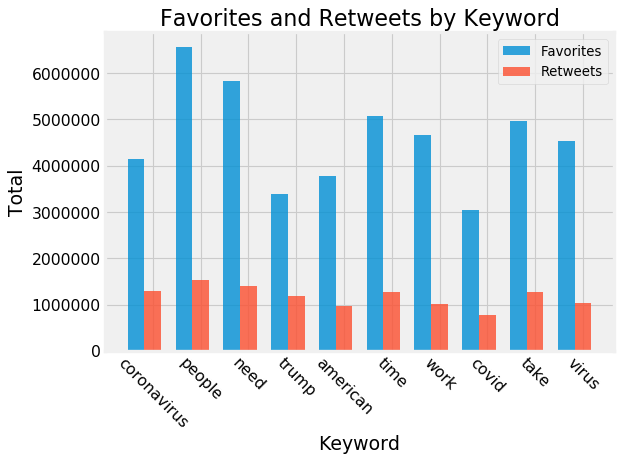

In [13]:
plt.style.use('fivethirtyeight')

# data to plot
n_groups = 10
favs = keyword_df['num_favorites']
retweets = keyword_df['num_retweets']

# create plot
fig=plt.figure(
    figsize=(8, 6), 
    dpi= 80, 
    facecolor='w', 
    edgecolor='k'
)

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(
    index, 
    favs, 
    bar_width,
    alpha=opacity,
    label='Favorites'
)

rects2 = plt.bar(
    index + bar_width, 
    retweets, 
    bar_width,
    alpha=opacity,
    label='Retweets'
)

plt.ylabel('Total', size=17)
plt.xlabel('Keyword', size=17)
plt.title('Favorites and Retweets by Keyword', size=20)
plt.xticks(index + bar_width, keyword_df['keyword'], rotation=-45)
plt.legend(prop={'size': 12})

plt.tight_layout()
plt.show()

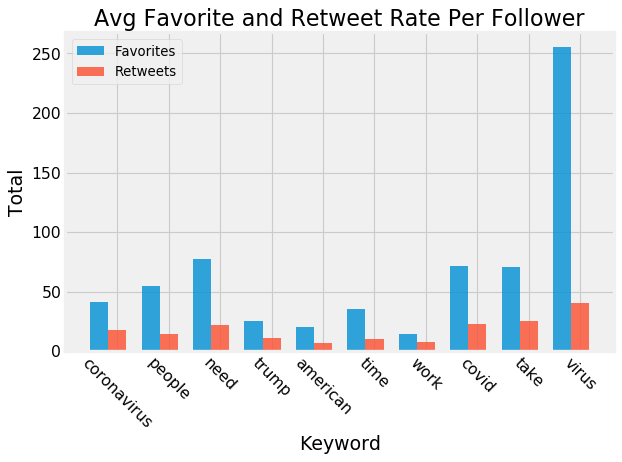

In [14]:
plt.style.use('fivethirtyeight')

# data to plot
n_groups = 10
fav_rate = keyword_df['avg_fav_rate']
retweet_rate = keyword_df['avg_retweet_rate']

# create plot
fig=plt.figure(
    figsize=(8, 6), 
    dpi= 80, 
    facecolor='w', 
    edgecolor='k'
)

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(
    index, 
    fav_rate, 
    bar_width,
    alpha=opacity,
    label='Favorites'
)

rects2 = plt.bar(
    index + bar_width, 
    retweet_rate, 
    bar_width,
    alpha=opacity,
    label='Retweets'
)

plt.ylabel('Total', size=17)
plt.xlabel('Keyword', size=17)
plt.title('Avg Favorite and Retweet Rate Per Follower', size=20)
plt.xticks(index + bar_width, keyword_df['keyword'], rotation=-45)
plt.legend(prop={'size': 12})

plt.tight_layout()
plt.show()

In [15]:
tweets[tweets['retweet_rate'] > 20]

,Tweet,Num_Favorites,Num_Retweets,Num_Followers,Created_At,id,fav_rate,retweet_rate
38,I am committing 100 cr towards fighting the Pa...,67812,16579,82092,2020-03-22 11:47:02,1241692860359102464,82.604882,20.195634
41,The H1N1 swine flu pandemic that infected up t...,410468,102687,412519,2020-03-22 12:19:24,1241701009144995840,99.502811,24.892672
58,You wasted precious months when you could've t...,173640,45490,103093,2020-03-22 16:54:08,1241770144545869826,168.430446,44.125207
59,When this is over please invite me everywhere ...,143160,54341,107203,2020-03-22 17:13:35,1241775042712780801,133.541039,50.689813
65,“If you are irresponsible enough to think that...,42253,32069,71088,2020-03-22 19:06:17,1241803403619172359,59.437598,45.111693
...,...,...,...,...,...,...,...,...
473,925 healed in Italy in the last 24 hours. I se...,95962,42388,80928,2020-03-28 16:50:53,1243943655511130115,118.577007,52.377422
483,"Because everyone in Italy is quarantined, the ...",392041,84257,34048,2020-03-28 20:03:07,1243992034324746240,1151.436208,247.465343
491,The first US death from the coronavirus was Fe...,46354,18293,22966,2020-03-28 23:35:08,1244045386341404680,201.837499,79.652530
494,MA received 17% of requested medical supplies ...,27889,22195,48183,2020-03-29 00:09:08,1244053944554401800,57.881410,46.063964


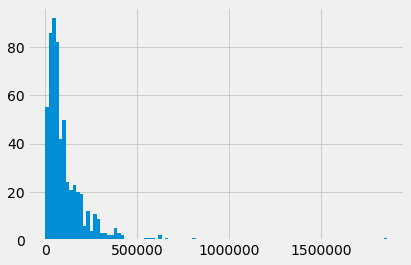

In [21]:
tweets['Num_Favorites'].hist(bins=100)

In [16]:
tweets['log(Num_Favorites)'] = np.log(tweets["Num_Favorites"])
tweets['log(Num_Retweets)'] = np.log(tweets["Num_Retweets"])

tweets['log(fav_rate)'] = np.log(tweets["fav_rate"])
tweets['log(retweet_rate)'] = np.log(tweets["retweet_rate"])

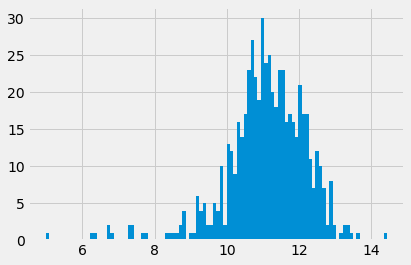

In [17]:
tweets['log(Num_Favorites)'].hist(bins=100)

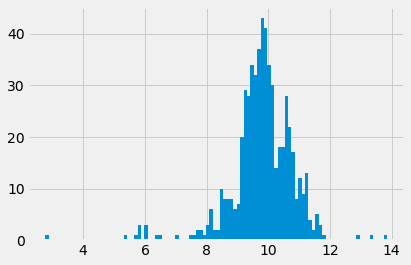

In [18]:
tweets['log(Num_Retweets)'].hist(bins=100)

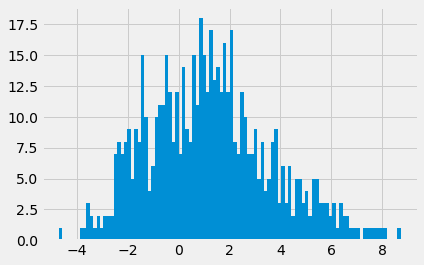

In [19]:
tweets['log(fav_rate)'].hist(bins=100)

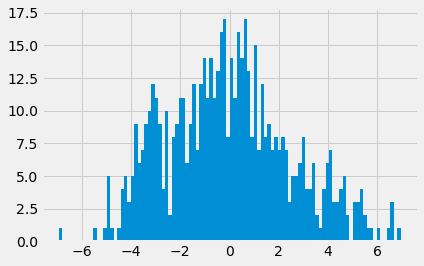

In [20]:
tweets['log(retweet_rate)'].hist(bins=100)

In [22]:
tweets.sort_values("Created_At")

,Tweet,Num_Favorites,Num_Retweets,Num_Followers,Created_At,id,fav_rate,retweet_rate,log(Num_Favorites),log(Num_Retweets),log(fav_rate),log(retweet_rate)
0,New York women are crushing on Andrew Cuomo: '...,146,16,1618684,2020-03-22 04:41:05,1241585667613896704,0.009020,0.000988,4.983607,2.772589,-4.708347,-6.919365
1,This is the scene at one of Sydney’s many nort...,1626,430,247370,2020-03-22 04:42:18,1241585976385753089,0.657315,0.173829,7.393878,6.063785,-0.419592,-1.749685
2,'Masked Singer' gifts Alice with photos of Cha...,1573,412,5456231,2020-03-22 04:44:51,1241586614243135496,0.028829,0.007551,7.360740,6.021023,-3.546359,-4.886075
3,Maddow - the woman who has peddled lies and wi...,1486,613,421490,2020-03-22 04:47:35,1241587305644724225,0.352559,0.145436,7.303843,6.418365,-1.042538,-1.928016
4,If any other President in recent U.S&gt; histo...,2219,628,409468,2020-03-22 04:47:35,1241587304486989825,0.541923,0.153370,7.704812,6.442540,-0.612632,-1.874904
...,...,...,...,...,...,...,...,...,...,...,...,...
579,I am a great friend and admirer of the Queen &...,171292,40125,75463706,2020-03-29 19:00:26,1244338645198352386,0.226986,0.053171,12.051125,10.599755,-1.482867,-2.934237
580,“...but i’ve been stuck inside this place for ...,53462,12825,11518637,2020-03-29 19:09:09,1244340838521425920,0.464135,0.111341,10.886726,9.459152,-0.767580,-2.195155
581,Now's a great time to call dibs on the comfies...,6618,2190,1153867,2020-03-29 19:36:16,1244347662612086784,0.573550,0.189797,8.797548,7.691657,-0.555911,-1.661802
582,Thank you very much to Ken Langone for being a...,16333,3407,75463706,2020-03-29 20:03:36,1244354540486512640,0.021644,0.004515,9.700943,8.133587,-3.833049,-5.400405
